# Studies of data reuse: Recordings of spiking activity and local field potentials from Human Visual Cortex V3 (v1)

In this notebook we will look more closely at the EBRAINS dataset "[Recordings of spiking activity and local field potentials from Human Visual Cortex V3 (v1))](https://search.kg.ebrains.eu/?category=Dataset&modality[0]=electrophysiology&dataAccessibility[0]=controlled%20access#c76ee58e-2187-4b33-ad45-cf1ea7ab0d65)", contributed by Matthew W. Self from the department of Psychiatry, Academic Medical Center, Amsterdam, The Netherlands.

As we can see from the dataset description,

The data has been filtered into spiking activity and local field potential. Data from several different visual tasks are presented. The data show very clear receptive-fields, in both spiking and gamma frequencies. The tuning curves (orientation, contrast, spatial frequency, size) resemble those from macaque monkeys. Also, the effects of context and attention were studied using a figure-ground segregation task and a curve-tracing task respectively.

More information is available in the [Data Descriptor](https://search.kg.ebrains.eu/?category=Dataset&modality[0]=electrophysiology&dataAccessibility[0]=controlled%20access#c76ee58e-2187-4b33-ad45-cf1ea7ab0d65).

This dataset forms part of the results reported in Self, M. W., Peters, J. C., Possel, J. K., Reithler, J., Goebel, R., Ris, P., Jeurissen, D., Reddy, L., Claus, S., Baayen, J. C., & Roelfsema, P. R. (2016). The Effects of Context and Attention on Spiking Activity in Human Early Visual Cortex. *PLOS Biology*, **14**(3), https://journals.plos.org/plosbiology/article?id=10.1371/journal.pbio.1002420

In this notebook we will demonstrate how to access the data files and the metadata from this study, and how these data can be analysed and visualised, with the goal of reproducing some of the figures from the article.

### Notes: 
Mentions area E6 and E7 but no idea how to seperate these in mat files

also mentions power change no idea what it is, could be linked to local field potential

"We also observed pronounced gamma oscillations in the local-field potential that could be used to estimate the underlying spiking response properties."

3 different values: LFP, power change, gamma power
also missing spike rate

"To measure the influence of stimulus presentation on gamma power in the LFP, we computed the increase in power per frequency bin in a window from 100–250 ms after stimulus onset relative to the pre-stimulus epoch (150–0 ms before the stimulus)."

In [2]:
#prepare notebook
!pip install scipy
import scipy.io
import numpy as np
!pip install h5py
import h5py
!pip install pymatreader
from pymatreader import read_mat
!pip install pandas
import pandas as pd
from scipy.io import loadmat
import mat73
!pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
!pip install openpyxl
import openpyxl
import numpy as np
from statistics import mean
from matplotlib import style
import scipy.stats as stats
from openpyxl import Workbook
from openpyxl.chart import (
    ScatterChart,
    Reference,
    Series,
)
import matplotlib.mlab as mlab

     |████████████████████████████████| 16.9 MB 12.0 MB/s eta 0:00:01
ERROR: elephant 0.11.0 has requirement neo>=0.10.0, but you'll have neo 0.9.0 which is incompatible.
ERROR: mat2py 0.0.21 has requirement scipy<2.0.0,>=1.7.0; python_version >= "3.8", but you'll have scipy 1.6.3 which is incompatible.
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.2
    Uninstalling numpy-1.24.2:
      Successfully uninstalled numpy-1.24.2


From the data descriptor:

Receptive field mapping: 	RFmapping.mat

Orientation tuning: 		ORItuning.mat

Spatial frequency tuning: 	SFtuning.mat

Contrast tuning: 		CONTRASTtuning.mat

Size tuning: 			SIZEtuning.mat

Contextual effects: 		CONTEXT.mat

Curve Tracing: 			CURVET.mat

In [17]:
#presentation of the data
RF=scipy.io.loadmat('RFmapping.mat')
print(data)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Jan 12 11:00:58 2016', '__version__': '1.0', '__globals__': [], 'MUAT': array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., 99.56892308,
        75.0576127 , 50.87476879],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]]), 'MUA': array([[2.1430735 , 2.84432237, 2.90110982, ..., 2.38545419, 2.56528444,
        2.63093518],
       [1.33728335, 2.12152275, 2.62827211, ..., 2.17810075, 1.91544968,
        1.93399578],
       [2.12524423, 2.57555161, 2.16393624, ..

In [18]:
RF.keys()

dict_keys(['__header__', '__version__', '__globals__', 'MUA', 'MUAT', 'LFP', 'DETS', 'TD', 'FsD'])

In [21]:
print(RF['TD'])

[[-1.99972278e-01]
 [-1.98897208e-01]
 [-1.97822137e-01]
 [-1.96747066e-01]
 [-1.95671996e-01]
 [-1.94596925e-01]
 [-1.93521854e-01]
 [-1.92446784e-01]
 [-1.91371713e-01]
 [-1.90294390e-01]
 [-1.89219320e-01]
 [-1.88144249e-01]
 [-1.87069178e-01]
 [-1.85994108e-01]
 [-1.84919037e-01]
 [-1.83843966e-01]
 [-1.82768896e-01]
 [-1.81693825e-01]
 [-1.80618754e-01]
 [-1.79543684e-01]
 [-1.78468613e-01]
 [-1.77393542e-01]
 [-1.76318472e-01]
 [-1.75243401e-01]
 [-1.74167078e-01]
 [-1.73092008e-01]
 [-1.72016937e-01]
 [-1.70941866e-01]
 [-1.69866796e-01]
 [-1.68791725e-01]
 [-1.67716654e-01]
 [-1.66641584e-01]
 [-1.65566513e-01]
 [-1.64491442e-01]
 [-1.63416372e-01]
 [-1.62341301e-01]
 [-1.61266230e-01]
 [-1.60191160e-01]
 [-1.59113837e-01]
 [-1.58038766e-01]
 [-1.56963696e-01]
 [-1.55888625e-01]
 [-1.54813554e-01]
 [-1.53738484e-01]
 [-1.52663413e-01]
 [-1.51588342e-01]
 [-1.50513272e-01]
 [-1.49438201e-01]
 [-1.48363130e-01]
 [-1.47288060e-01]
 [-1.46212989e-01]
 [-1.45137919e-01]
 [-1.4406284

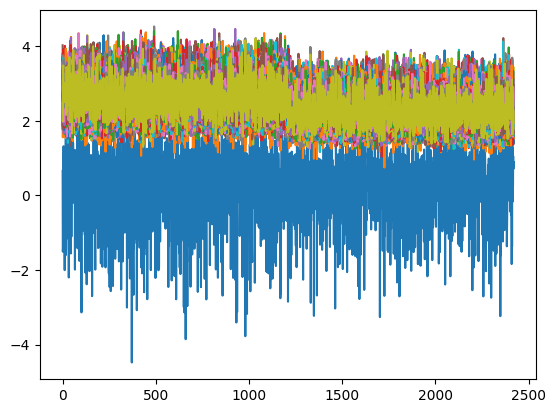

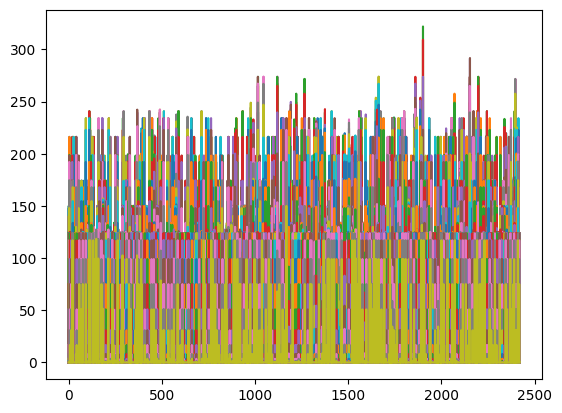

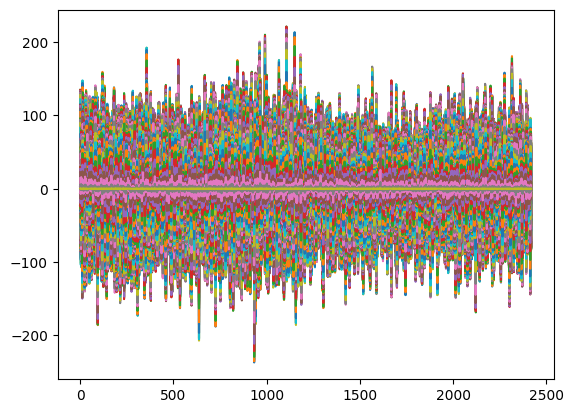

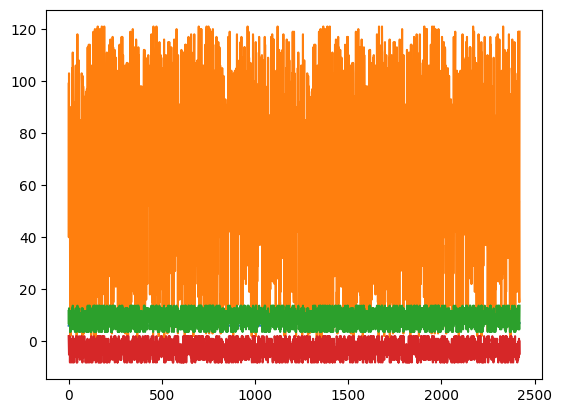

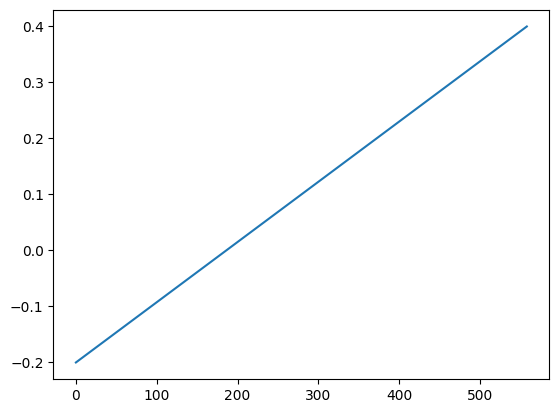

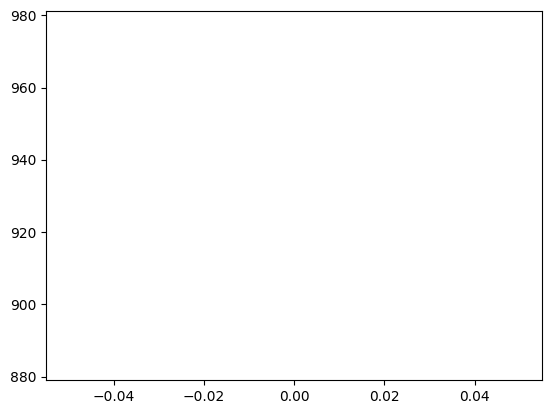

In [13]:
plt.plot(RF['MUA'])
plt.show()
plt.plot(RF['MUAT'])
plt.show()
plt.plot(RF['LFP'])
plt.show()
plt.plot(RF['DETS'])
plt.show()
plt.plot(RF['TD'])
plt.show()
plt.plot(RF['FsD'])
plt.show()

"The data from the RF mapping experiment (shown in Fig 2) were normalized by dividing by the average activity in a window from 0.05–0.3 s from the position that gave the strongest response"

"All other MUA data were normalized by dividing by the peak response in a time window between 0.03 and 0.15 s."

The MUA time courses averaged across E6 and E7. The inset shows responses during the early phase. 

In [6]:
#presentation of the data
C=scipy.io.loadmat('CONTEXT.mat')
print(data)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Jan 12 11:00:58 2016', '__version__': '1.0', '__globals__': [], 'MUAT': array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., 99.56892308,
        75.0576127 , 50.87476879],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]]), 'MUA': array([[2.1430735 , 2.84432237, 2.90110982, ..., 2.38545419, 2.56528444,
        2.63093518],
       [1.33728335, 2.12152275, 2.62827211, ..., 2.17810075, 1.91544968,
        1.93399578],
       [2.12524423, 2.57555161, 2.16393624, ..

In [7]:
#presentation of the data
CT=scipy.io.loadmat('CONTRASTtuning.mat')
print(data)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Jan 12 11:00:58 2016', '__version__': '1.0', '__globals__': [], 'MUAT': array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., 99.56892308,
        75.0576127 , 50.87476879],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]]), 'MUA': array([[2.1430735 , 2.84432237, 2.90110982, ..., 2.38545419, 2.56528444,
        2.63093518],
       [1.33728335, 2.12152275, 2.62827211, ..., 2.17810075, 1.91544968,
        1.93399578],
       [2.12524423, 2.57555161, 2.16393624, ..

In [8]:
#presentation of the data
Curve=scipy.io.loadmat('CURVET.mat')
print(data)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Jan 12 11:00:58 2016', '__version__': '1.0', '__globals__': [], 'MUAT': array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., 99.56892308,
        75.0576127 , 50.87476879],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]]), 'MUA': array([[2.1430735 , 2.84432237, 2.90110982, ..., 2.38545419, 2.56528444,
        2.63093518],
       [1.33728335, 2.12152275, 2.62827211, ..., 2.17810075, 1.91544968,
        1.93399578],
       [2.12524423, 2.57555161, 2.16393624, ..

In [9]:
#presentation of the data
ORI=scipy.io.loadmat('ORItuning.mat')
print(data)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Jan 12 11:00:58 2016', '__version__': '1.0', '__globals__': [], 'MUAT': array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., 99.56892308,
        75.0576127 , 50.87476879],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]]), 'MUA': array([[2.1430735 , 2.84432237, 2.90110982, ..., 2.38545419, 2.56528444,
        2.63093518],
       [1.33728335, 2.12152275, 2.62827211, ..., 2.17810075, 1.91544968,
        1.93399578],
       [2.12524423, 2.57555161, 2.16393624, ..

In [10]:
#presentation of the data
SF=scipy.io.loadmat('SFtuning.mat')
print(data)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Jan 12 11:00:58 2016', '__version__': '1.0', '__globals__': [], 'MUAT': array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., 99.56892308,
        75.0576127 , 50.87476879],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]]), 'MUA': array([[2.1430735 , 2.84432237, 2.90110982, ..., 2.38545419, 2.56528444,
        2.63093518],
       [1.33728335, 2.12152275, 2.62827211, ..., 2.17810075, 1.91544968,
        1.93399578],
       [2.12524423, 2.57555161, 2.16393624, ..

In [11]:
#presentation of the data
Size=scipy.io.loadmat('SIZEtuning.mat')
print(data)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Jan 12 11:00:58 2016', '__version__': '1.0', '__globals__': [], 'MUAT': array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., 99.56892308,
        75.0576127 , 50.87476879],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]]), 'MUA': array([[2.1430735 , 2.84432237, 2.90110982, ..., 2.38545419, 2.56528444,
        2.63093518],
       [1.33728335, 2.12152275, 2.62827211, ..., 2.17810075, 1.91544968,
        1.93399578],
       [2.12524423, 2.57555161, 2.16393624, ..

### The mean eye-traces from all trials for the x (left panel) and y (right panel) positions. The position of the eyes was very stable during the analysis period, with no differences between the conditions. Supplementary figure 6

From our data; there is eye position data in two places: 

In [3]:
Curve=scipy.io.loadmat('CURVET.mat')
Curve.keys()
len(Curve['EYEX'][0])
len(Curve['EYEX'])

dict_keys(['__header__', '__version__', '__globals__', 'MUA', 'LFP', 'MUAT', 'DETS', 'EYEX', 'EYEY', 'TD', 'FsD', 'eyetb'])

In [14]:
len(Curve['eyetb'][0])

2500

In [23]:
list_of_lists = []
i=0
while i<628: 
    list_of_lists.append(Curve['EYEX'][i])
    i=i+1
column_average = [sum(sub_list) / len(sub_list) for sub_list in zip(*list_of_lists)]

In [24]:
column_average = [sum(sub_list) / len(sub_list) for sub_list in zip(*list_of_lists)]

(0.0, 1500.0)

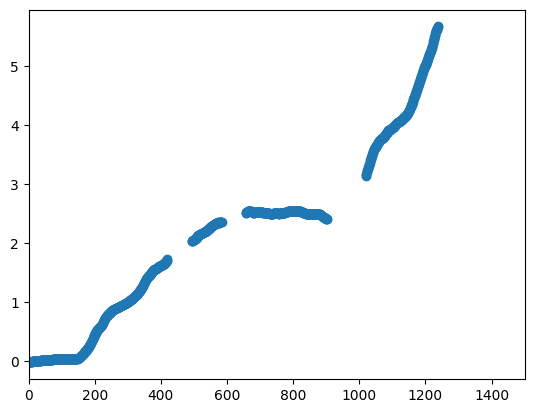

In [25]:
plt.scatter(Curve['eyetb'][0],column_average)
plt.xlim(0,1500)

(500.0, 2000.0)

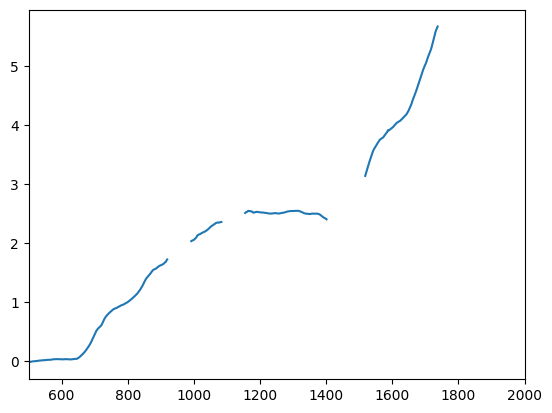

In [29]:
plt.plot(column_average)
plt.xlim(500,2000)

In [8]:
C=scipy.io.loadmat('CONTEXT.mat')
len(C['EYEX'])

1680

In [9]:
len(C['EYEX'][0])

1000

In [19]:
len(C['eyetb'][0])

1000

(0.0, 1500.0)

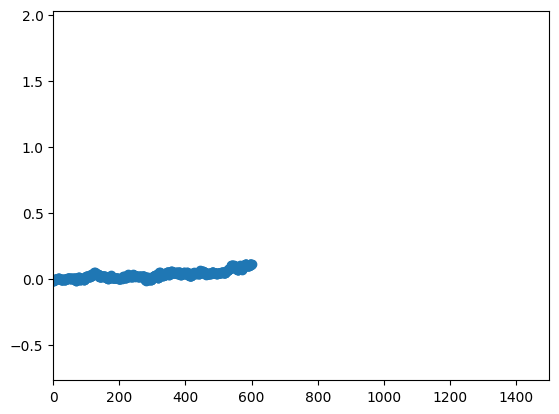

In [21]:
plt.scatter(C['eyetb'][0],C['EYEX'][0])
plt.xlim(0,1500)

(0.0, 1500.0)

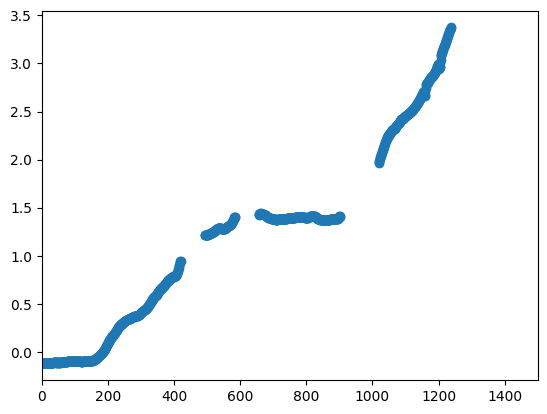

In [54]:
list_of_lists = []
i=0
while i<628: 
    list_of_lists.append(Curve['EYEY'][i])
    i=i+1
column_average = [sum(sub_list) / len(sub_list) for sub_list in zip(*list_of_lists)]
plt.scatter(Curve['eyetb'][0],column_average)
plt.xlim(0,1500)

### Fig 3 b

In [44]:

ORI=scipy.io.loadmat('ORItuning.mat')
len(ORI['MUA'])

796

In [38]:
ORI.keys()

dict_keys(['__header__', '__version__', '__globals__', 'MUA', 'LFP', 'DETS', 'MUAT', 'TD', 'FsD'])

In [39]:
len(ORI['TD'])

1395

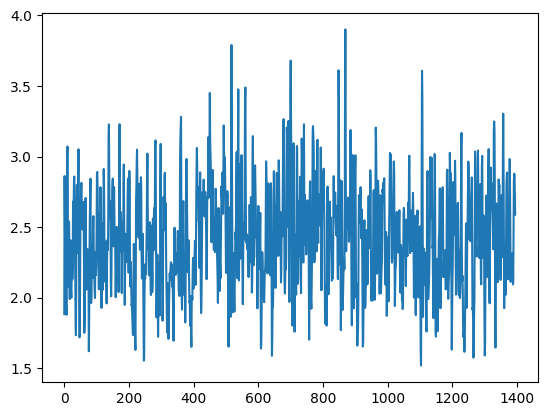

In [32]:
plt.plot(ORI['MUA'][0])

[[0.02065269 0.0313678  0.02729129 ... 0.03142986 0.0299015  0.02836905]]


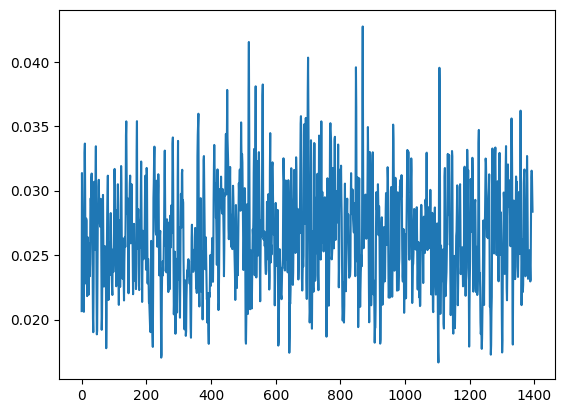

In [36]:
#normalizing the data
from sklearn import preprocessing
import numpy as np

x_array = np.array(ORI['MUA'][0])
normalized_arr = preprocessing.normalize([x_array])
plt.plot(normalized_arr[0])
plt.show()

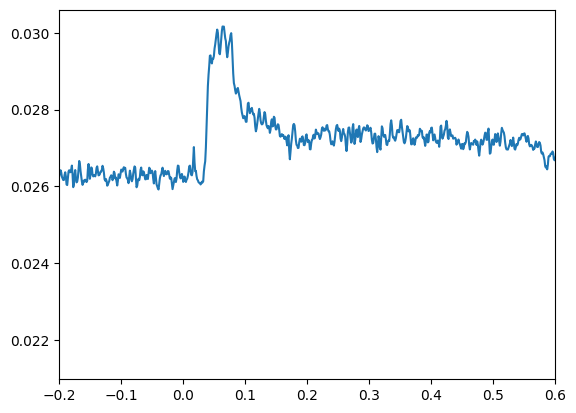

In [55]:
list_of_lists = []
i=0
while i<796: 
    list_of_lists.append(ORI['MUA'][i])
    i=i+1
column_average = [sum(sub_list) / len(sub_list) for sub_list in zip(*list_of_lists)]
#normalizing the data
from sklearn import preprocessing
import numpy as np

x_array = np.array(column_average)
normalized_arr = preprocessing.normalize([x_array])

plt.plot(ORI['TD'],normalized_arr[0])
plt.xlim(-0.2,0.6)
plt.show()

### S1G

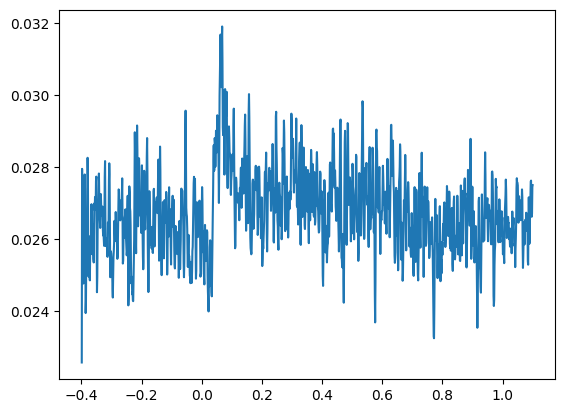

In [57]:
list_of_lists = []
i=0
while i<20: 
    list_of_lists.append(ORI['MUA'][i])
    i=i+1
column_average = [sum(sub_list) / len(sub_list) for sub_list in zip(*list_of_lists)]
#normalizing the data
from sklearn import preprocessing
import numpy as np

x_array = np.array(column_average)
normalized_arr = preprocessing.normalize([x_array])

plt.plot(ORI['TD'],normalized_arr[0])

plt.show()